/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Log scale: values of z <= 0 have been masked


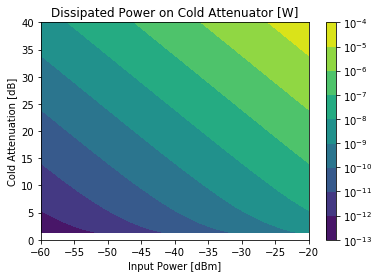

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Log scale: values of z <= 0 have been masked


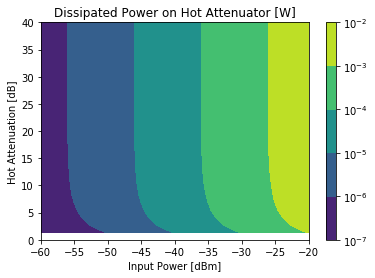

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

#parametric plots
numSamples=30
N=400   #number of detectors
PindBm = np.linspace(start=-20, stop=-60, num=numSamples) ## Hot Attenuation dB
AthdB = np.linspace(start=0, stop=40, num=numSamples) ## Cold Attenuation dB
AtcdB = np.linspace(start=0, stop=40, num=numSamples) ## Cold Attenuation dB

Pin=1e-3*10**(PindBm/10)   ## input power W
Ath=10**(AthdB/10) ## Hot Attenuation times
Atc=10**(AtcdB/10) ## Cold Attenuation times
maxatt=10**(60/10) ## Max att
x, y = np.meshgrid(Pin,Atc)
w, z = np.meshgrid(Pin,Atc)

#Power calculations
Pdissh=N*w*(1-(1/(z)))
Pdissc=N*(x/(maxatt/y))*(1-(1/y))

c = plt.contourf(PindBm,AtcdB,Pdissc,locator=ticker.LogLocator()) 
plt.colorbar()
plt.ylabel("Cold Attenuation [dB]")
plt.xlabel("Input Power [dBm]")
plt.title("Dissipated Power on Cold Attenuator [W]")
plt.savefig('CoolingPowerColdAtt.pdf')
plt.show()
            
h = plt.contourf(PindBm,AthdB,Pdissh,locator=ticker.LogLocator())
plt.colorbar()
plt.ylabel("Hot Attenuation [dB]")
plt.xlabel("Input Power [dBm]")
plt.title("Dissipated Power on Hot Attenuator [W]")
plt.savefig('CoolingPowerHotAtt.pdf')
plt.show()            